In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

df0=pd.read_pickle('dfs/df_run_02_CTRL.pkl')[30:]
df0['rtpmax']=-df0['rtpmax']
dfl=pd.read_pickle('dfs/df_run_02_land.pkl')
# df1n=pd.read_pickle('dfs/df_run_01_CTRL_smcc.pkl')
# df1nn=pd.read_pickle('dfs/df_run_01_CTRL_smcc_smrp.pkl')
dfd=pd.read_pickle('dfs/df_run_02_dry.pkl')
# dfs=[df0,df1,df2]
dfs=[df0,dfl,dfd]

for df in dfs:
    df['Pd0']=1010-df['Pmin']

12
0
12


(0.0, 80.0)

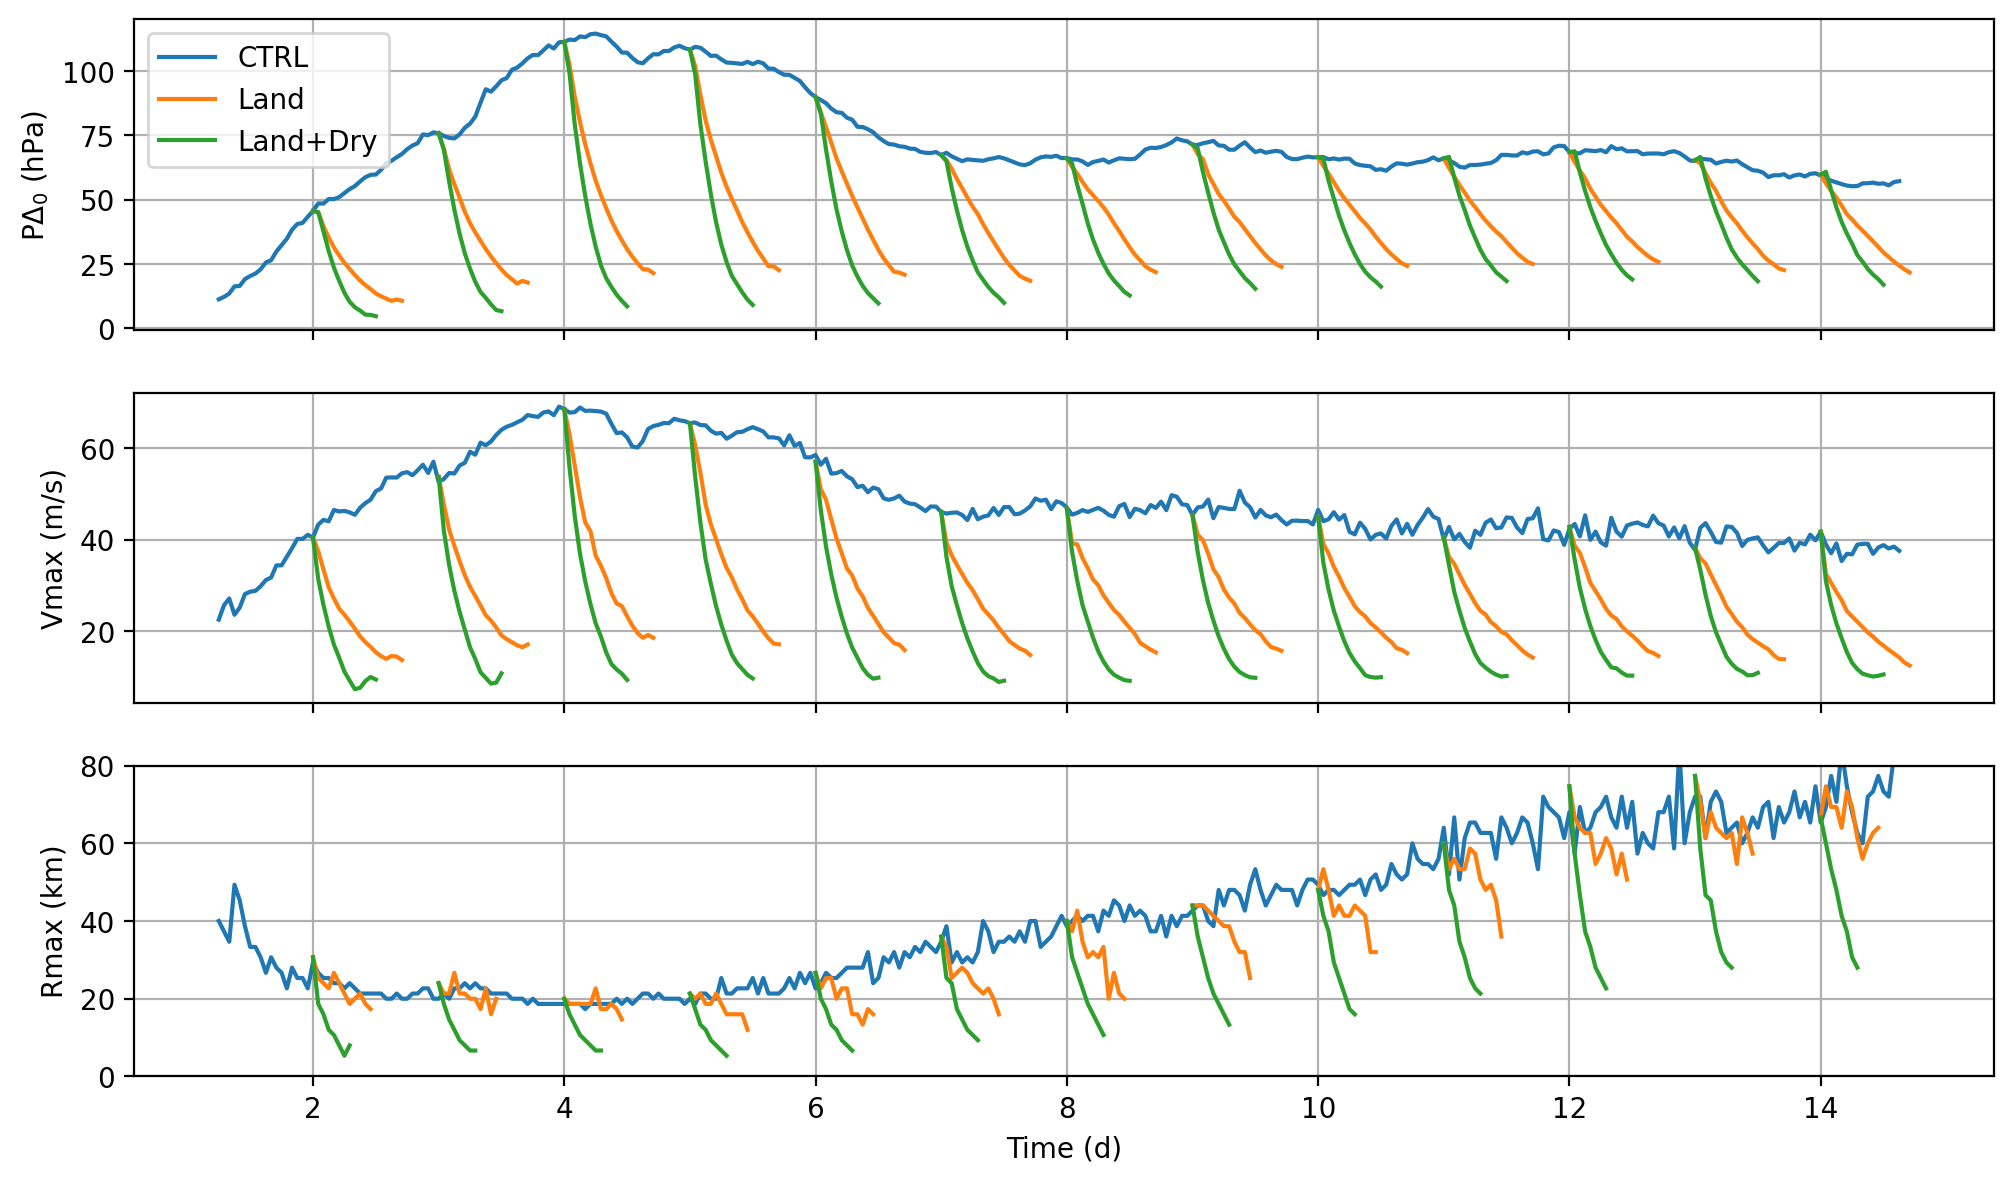

In [34]:
hs=[]
fig,axs=plt.subplots(3,1,dpi=200,figsize=(12,7),sharex=True)
pvars=[
    {'y':'Pd0',      'ylab':'P$\Delta_0$ (hPa)'},
    {'y':'V10max',    'ylab':'Vmax (m/s)'},
    {'y':'rV10max',   'ylab':'Rmax (km)'},]

#     {'y':'tp500',     'ylab':'TP500'},
#     {'y':'tpmaxpoint','ylab':'TPmax point'},
#     {'y':'tpmax',     'ylab':'TPmax'},
#     {'y':'rtpmax',    'ylab':'RTPmax (km)'},
# ]

cols=['C0','C1','C2']
for df,col,ndf in zip(dfs,cols,range(len(cols))):
    for ax,pvar in zip(axs.flatten(order='F'),pvars):
        for n,tlf in enumerate(df.tlf.unique()):
            dft=df[df.tlf.eq(tlf)]
            if tlf>0: 
                if pvar['y']=='rV10max':
                    tmax=12
                    if ndf==2:
                        tmax=8
                else:
                    tmax=18
                dft=dft[:tmax]
                
            h=ax.plot(dft.t,dft[pvar['y']],color=col)
        ax.grid(True)
        ax.set_ylabel(pvar['ylab'])
    hs.append(h[0])

axs[2].set_xlabel('Time (d)')
# axs[2].set_ylim((0,80))
# axs[2,1].set_xlabel('t (d)')

axs.flat[0].legend(hs,('CTRL','Land','Land+Dry'))
axs.flatten(order='F')[2].set_ylim((0,80))
# axs.flat[-1].axis('off')